# Gather 

In [2]:
import pandas as pd
import numpy as np
import requests
import tweepy
from bs4 import BeautifulSoup
import json
from timeit import default_timer as timer

In [3]:
#Read the csv file 
df_twitter = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
#Use Requests library to programatically download image-prediction.tsv file from website
url =  'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

#Save image-predictions.tsv to file
with open('image-predictions.tsv', mode = 'wb') as file:
      file.write(response.content)

#Read the tsv file
df_image = pd.read_csv('image-predictions.tsv', sep='\t')


In [5]:
#Details of authentication
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

#Variables for Twitter API connections
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify = True)

In [ ]:
#Fetch data from Twitter and append each tweet into a list
count = 0 
tweet_ids = df_twitter['tweet_id']

tweet_data = []
for tweet_id in tweet_ids:
    count += 1
    print(str(count))
    try:
        temp = api.get_status(tweet_id, tweet_mode='extended')._json
        tweet_data.append({'tweet_id':temp['id'],
                           'created_at':temp['created_at'],
                           'favorite_count':temp['favorite_count'],
                           'favorited':temp['favorited'],
                           'retweet_count':temp['retweet_count'],
                           'retweeted':temp['retweeted']})
        print(str(tweet_id) + ': done')
    except tweepy.TweepError as t:
        print('{} : {}'.format(tweet_id, t))

In [ ]:
#Create a tweet_json.txt file for tweet data

with open('tweet_json.txt','w') as outfile:
    json.dump(tweet_data, outfile)

In [6]:
#Read data from tweet_json file
with open('tweet_json.txt') as json_file:
    data = json.load(json_file)

In [7]:
#Create a data frame for tweet data
df_json = pd.DataFrame(data, columns = ['tweet_id', 'created_at', 'favorite_count', 'favorited', 'retweet_count', 'retweeted'])

# Assess

In [8]:
#Display full data frame information
pd.set_option('display.max_colwidth', -1)

### Twitter Table

In [9]:
df_twitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

- tweet_id: unique tweet identifier
- in_reply_to_status_id:the status id of tweet reply to the tweet_id
- in_reply_to_user_id: the user id of tweet reply to the tweet id
- timestamp: time of the tweet
- source: where the tweet originated (Twitter iPhone, Vine, Twitter web, TweetDeck)
- text: the content of tweet
- retweeted_status_id: status identifier for retweets
- retweeted_status_user_id: user identifier for retweets
- retweeted_status_timestamp: time of retweet
- expanded_urls: the url where the tweet is housed
- rating_numerator: the numerator of rating
- rating_denominator: the denominator of rating
- name: given name of the dog
- doggo: dog stage (adult)
- floofer: dog stage (fluffy)
- pupper: dog stage (young)
- puppo: dog stage (transitioning from young to adult)

In [10]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
df_twitter.isnull().sum()

tweet_id                      0   
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                     0   
source                        0   
text                          0   
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                 59  
rating_numerator              0   
rating_denominator            0   
name                          0   
doggo                         0   
floofer                       0   
pupper                        0   
puppo                         0   
dtype: int64

In [12]:
df_twitter.tweet_id.duplicated().sum()

0

In [13]:
df_twitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
df_twitter.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [15]:
df_twitter.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [16]:
df_twitter.name.value_counts()

None        745
a           55 
Charlie     12 
Oliver      11 
Lucy        11 
Cooper      11 
Tucker      10 
Lola        10 
Penny       10 
Bo          9  
Winston     9  
Sadie       8  
the         8  
Bailey      7  
an          7  
Toby        7  
Daisy       7  
Buddy       7  
Milo        6  
Dave        6  
Leo         6  
Bella       6  
Oscar       6  
Stanley     6  
Koda        6  
Scout       6  
Jack        6  
Jax         6  
Rusty       6  
Phil        5  
           ..  
Mac         1  
Pavlov      1  
Ralpher     1  
Trigger     1  
Zara        1  
Boston      1  
Derby       1  
Bauer       1  
Ester       1  
Storkson    1  
Joey        1  
Apollo      1  
Perry       1  
Lucia       1  
Flurpson    1  
Berkeley    1  
Skye        1  
Gunner      1  
Wesley      1  
Oddie       1  
Grizzie     1  
Tedrick     1  
Pherb       1  
Liam        1  
Linus       1  
Luther      1  
Buddah      1  
Aqua        1  
Cora        1  
Batdog      1  
Name: name, Length: 957,

In [17]:
#Some names (in lower case) are not real dog names
names = df_twitter.name
wrong_name = dict()
for i in names:
    if i[0].islower():
        if i not in wrong_name:
            wrong_name[i]=1
        else:
            wrong_name[i]=wrong_name[i]+1

wrong_name = pd.DataFrame.from_dict(data = wrong_name, orient = 'index', columns= ['Count'])
wrong_name

,Count
such,1
a,55
quite,4
not,2
one,4
incredibly,1
mad,2
an,7
very,5
just,4


In [18]:
df_twitter.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [19]:
df_twitter.doggo.value_counts()

None     2259
doggo    97  
Name: doggo, dtype: int64

In [20]:
df_twitter.floofer.value_counts()

None       2346
floofer    10  
Name: floofer, dtype: int64

In [21]:
df_twitter.pupper.value_counts()

None      2099
pupper    257 
Name: pupper, dtype: int64

In [22]:
df_twitter.puppo.value_counts()

None     2326
puppo    30  
Name: puppo, dtype: int64

### Image Table

In [23]:
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


- tweet_id is the last part of the tweet URL after "status/"
- p1 is the algorithm's #1 prediction for the image in the tweet
- p1_conf is how confident the algorithm is in its #1 prediction 
- p1_dog is whether or not the #1 prediction is a breed of dog 
- p2 is the algorithm's second most likely prediction 
- p2_conf is how confident the algorithm is in its #2 prediction 
- p2_dog is whether or not the #2 prediction is a breed of dog 

In [24]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
df_image.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [26]:
df_image.duplicated().sum()

0

In [27]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [28]:
df_image.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                     89 
Chihuahua                    83 
pug                          57 
chow                         44 
Samoyed                      43 
toy_poodle                   39 
Pomeranian                   38 
malamute                     30 
cocker_spaniel               30 
French_bulldog               26 
Chesapeake_Bay_retriever     23 
miniature_pinscher           23 
seat_belt                    22 
Staffordshire_bullterrier    20 
Siberian_husky               20 
German_shepherd              20 
Cardigan                     19 
web_site                     19 
Eskimo_dog                   18 
Maltese_dog                  18 
teddy                        18 
Shetland_sheepdog            18 
beagle                       18 
Rottweiler                   17 
Shih-Tzu                     17 
Lakeland_terrier             17 
kuvasz                       16 
Italian_greyhound            16 
          

In [29]:
df_image.p1_dog.value_counts()

True     1532
False    543 
Name: p1_dog, dtype: int64

In [30]:
df_image.p2.value_counts()

Labrador_retriever                104
golden_retriever                  92 
Cardigan                          73 
Chihuahua                         44 
Pomeranian                        42 
Chesapeake_Bay_retriever          41 
French_bulldog                    41 
toy_poodle                        37 
cocker_spaniel                    34 
miniature_poodle                  33 
Siberian_husky                    33 
beagle                            28 
Pembroke                          27 
Eskimo_dog                        27 
collie                            27 
kuvasz                            26 
Italian_greyhound                 22 
Pekinese                          21 
American_Staffordshire_terrier    21 
chow                              20 
toy_terrier                       20 
malinois                          20 
Samoyed                           20 
miniature_pinscher                20 
Norwegian_elkhound                19 
Boston_bull                       19 
Staffordshir

In [31]:
df_image.p2_dog.value_counts()

True     1553
False    522 
Name: p2_dog, dtype: int64

In [32]:
df_image.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
beagle                            31
cocker_spaniel                    31
Pomeranian                        29
Pekinese                          29
toy_poodle                        29
Pembroke                          27
Chesapeake_Bay_retriever          27
Great_Pyrenees                    27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
L

In [33]:
df_image.p3_dog.value_counts()

True     1499
False    576 
Name: p3_dog, dtype: int64

In [34]:
#There are non-dog images in the image_prediction.tsv file
non_dog_image = df_image[(df_image['p1_dog'] == False) & (df_image['p2_dog'] ==False) & (df_image['p3_dog'] == False)]
non_dog_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


In [35]:
df_twitter.tweet_id.isin(df_image.tweet_id).value_counts()

True     2075
False    281 
Name: tweet_id, dtype: int64

###  JSON Table

In [36]:
df_json

,tweet_id,created_at,favorite_count,favorited,retweet_count,retweeted
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,36371,False,7739,False
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,31328,False,5729,False
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,23608,False,3790,False
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,39675,False,7905,False
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,37881,False,8526,False
5,891087950875897856,Sat Jul 29 00:08:17 +0000 2017,19071,False,2852,False
6,890971913173991426,Fri Jul 28 16:27:12 +0000 2017,11111,False,1861,False
7,890729181411237888,Fri Jul 28 00:22:40 +0000 2017,61296,False,17268,False
8,890609185150312448,Thu Jul 27 16:25:51 +0000 2017,26270,False,3935,False
9,890240255349198849,Wed Jul 26 15:59:51 +0000 2017,30001,False,6733,False


In [37]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 6 columns):
tweet_id          2331 non-null int64
created_at        2331 non-null object
favorite_count    2331 non-null int64
favorited         2331 non-null bool
retweet_count     2331 non-null int64
retweeted         2331 non-null bool
dtypes: bool(2), int64(3), object(1)
memory usage: 77.5+ KB


In [38]:
df_json.duplicated().sum()

0

In [39]:
df_json.tweet_id.isin(df_image.tweet_id).value_counts()

True     2059
False    272 
Name: tweet_id, dtype: int64

In [40]:
df_json.created_at.isin(df_twitter.timestamp).value_counts()

False    2331
Name: created_at, dtype: int64

#### Quality
##### df_twitter table
- Columns with missing values: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls
- 181 records for retweets (we only focus on original tweets)
- Timestamp has a data type of datetime instead of object
- Some values in rating numerator and rating denominator are wrongly extracted from text.
- Different rating_denominator will make it hard to compare which dog has higher rating. 
- Source should be written in text instead of url
- Improper dog's name extraction should be changed to "None"
- Many tweet_id in df_twitter table are missing in df_image table

##### df_image table
- Lowercase in p1, p2, p3 columns
- Non-dog images

##### df_json table
- Created_at is duplicated with timestamp in df_twitter table
- Many tweet_id in df_json table are missing in df_image table

#### Tidiness
##### df_twitter table
- Four columns (doggo, floofer, pupper, puppo) should be integrated in to one column dog_stage.
- Parse year, month, date from timestamp for analysis.
- Merge table df_json, df_twitter and df_imange

# Clean

In [41]:
twitter_clean = df_twitter.copy()
image_clean = df_image.copy()
json_clean = df_json.copy()

### I. Table Twitter

### Missing Data

##### Define
- In the twitter table, remove 181 retweeted rows and then drop columns: retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp
- Drop columns in_reply_to_status_id, in_reply_to_user_id because of unnecessity.

##### Code

In [42]:
twitter_clean.drop(twitter_clean[twitter_clean.retweeted_status_user_id.notnull()].index, inplace = True)
twitter_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id','expanded_urls' ], axis= 1, inplace = True)

##### Test

In [43]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


### Tidiness

##### Define
Combine four columns (doggo, floofer, pupper, puppo) into one column called dog_stage. After that, remove these four columns. 

##### Code

In [44]:
#Replace "None" with blank space in 4 columns doggo, floofer, pupper and puppo
twitter_clean.doggo.replace('None', '', inplace = True)
twitter_clean.floofer.replace('None', '', inplace = True)
twitter_clean.pupper.replace('None', '', inplace = True)
twitter_clean.puppo.replace('None', '', inplace = True)

In [45]:
#Create a new column dog_stage
twitter_clean['dog_stage'] = twitter_clean.doggo + twitter_clean.floofer + twitter_clean.pupper + twitter_clean.puppo

In [46]:
#Rename and reformat values in dog_stage column
twitter_clean.loc[twitter_clean.dog_stage == 'pupper', 'dog_stage'] = 'Pupper'
twitter_clean.loc[twitter_clean.dog_stage == 'doggo', 'dog_stage'] = 'Doggo'
twitter_clean.loc[twitter_clean.dog_stage == 'puppo', 'dog_stage'] = 'Puppo'
twitter_clean.loc[twitter_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'Doggo, Pupper'
twitter_clean.loc[twitter_clean.dog_stage == 'floofer', 'dog_stage'] = 'Floofer'
twitter_clean.loc[twitter_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'Doggo, Floofer'
twitter_clean.loc[twitter_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'Doggo, Puppo'

In [47]:
#Drop 4 columns doggo, floofer, puper and pupo
twitter_clean.drop(['doggo', 'floofer', 'pupper','puppo'], axis =1, inplace = True)

##### Test

In [48]:
#list all columns
twitter_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

In [49]:
twitter_clean.dog_stage.value_counts()

                  1831
Pupper            224 
Doggo             75  
Puppo             24  
Doggo, Pupper     10  
Floofer           9   
Doggo, Puppo      1   
Doggo, Floofer    1   
Name: dog_stage, dtype: int64

In [50]:
twitter_clean.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
1295,707983188426153984,2016-03-10 17:35:20 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@serial @MrRoles OH MY GOD I listened to all of season 1 during a single road trip. I love you guys! I can confirm Bernie's 12/10 rating :),12,10,None,
2201,668645506898350081,2015-11-23 04:21:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Incredibly rare dog here. Good at bipedalism. Rad blue spikes. Ready to dance. 11/10 https://t.co/70X1TIXn38,11,10,None,
208,852311364735569921,2017-04-13 00:03:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Wiggles. She would like you to spot her. Probably won't need your help but just in case. 13/10 powerful as h*ck https://t.co/2d370P0OEg,13,10,Wiggles,
184,856526610513747968,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY HI AFTER ALL. PUPGRADED TO A 14/10. WOULD BE AN HONOR TO FLY WITH https://t.co/p1hBHCmWnA",14,10,None,
1254,710658690886586372,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80,None,


##### Define

- Convert timestamp from object to datetime 
- Extract year, month, date from timestamp and save in 3 different columns

##### Code


In [51]:
from datetime import date

#Convert timestamp from object to datetime
twitter_clean.timestamp = pd.to_datetime(twitter_clean.timestamp)

#Extract year, month, date
twitter_clean['year'] = twitter_clean.timestamp.dt.year
twitter_clean['month'] = twitter_clean.timestamp.dt.month
twitter_clean['day']= twitter_clean.timestamp.dt.day

#Create a weekday column
twitter_clean['weekday']= twitter_clean.timestamp.dt.dayofweek
days = {0:'Monday', 1: 'Tuesday', 2:'Wednesday', 3:'Thursday',4:'Friday', 5:'Saturday', 6:'Sunday'}
twitter_clean.weekday = twitter_clean.weekday.apply(lambda x: days[x])

##### Test

In [52]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
dog_stage             2175 non-null object
year                  2175 non-null int64
month                 2175 non-null int64
day                   2175 non-null int64
weekday               2175 non-null object
dtypes: datetime64[ns](1), int64(6), object(5)
memory usage: 220.9+ KB


In [53]:
twitter_clean.year.value_counts()

2016    1088
2015    688 
2017    399 
Name: year, dtype: int64

In [54]:
twitter_clean.month.value_counts()

12    447
11    358
1     265
2     197
3     193
7     150
6     144
4     109
5     105
10    73 
9     69 
8     65 
Name: month, dtype: int64

In [55]:
twitter_clean.weekday.value_counts()

Monday       357
Tuesday      326
Wednesday    322
Friday       305
Thursday     305
Saturday     284
Sunday       276
Name: weekday, dtype: int64

In [56]:
twitter_clean.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,year,month,day,weekday
190,855857698524602368,2017-04-22 18:55:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","HE'S LIKE ""WAIT A MINUTE I'M AN ANIMAL THIS IS AMAZING HI HUMAN I LOVE YOU AS WELL"" 13/10 https://t.co/sb73bV5Y7S",13,10,None,,2017,4,22,Saturday
322,834167344700198914,2017-02-21 22:26:07,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sunshine. She doesn't believe in personal space. Eyes pretty far apart for a dog. Has horns (whoa). 11/10 would pet with wonder https://t.co/o3bhLguymB,11,10,Sunshine,,2017,2,21,Tuesday
1700,680959110691590145,2015-12-27 03:51:18,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Ozzie. He was doing fine until he lost traction in those festive socks. Now he's tired. 9/10 still killin it https://t.co/u4FYdIRKnY,9,10,Ozzie,,2015,12,27,Sunday
1399,699691744225525762,2016-02-16 20:28:06,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dave. He's a tropical pup. Short lil legs (dachshund mix?) Excels underwater, but refuses to eat kibble 5/10 https://t.co/ZJnCxlIf62",5,10,Dave,,2016,2,16,Tuesday
301,836677758902222849,2017-02-28 20:41:37,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Oliver. He's pretty exotic. Fairly pupset as well. Too many midterms coming pup. 11/10 would pet with extreme caution https://t.co/fGAPAsxjKs,11,10,Oliver,,2017,2,28,Tuesday


### Quality

##### Define

Change the source column from url to text 

##### Code

In [57]:
twitter_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2042
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     31  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [58]:
source_map = {'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>': 'Twitter for iPhone',
         '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>': 'Twitter Web Client',
         '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>': 'Vine - Make a Scene', 
         '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>':'TweetDeck'}

def source_text(twitter_clean):
    if twitter_clean.source in source_map.keys():
        abbrev = source_map[twitter_clean.source]
        return abbrev
    else:
        return twitter_clean.source

twitter_clean.source = twitter_clean.apply(source_text, axis = 1)

##### Test

In [59]:
twitter_clean.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene    91  
Twitter Web Client     31  
TweetDeck              11  
Name: source, dtype: int64

In [60]:
twitter_clean.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,year,month,day,weekday
46,883360690899218434,2017-07-07 16:22:55,Twitter for iPhone,Meet Grizzwald. He may be the floofiest floofer I ever did see. Lost eyes saving a schoolbus from a volcano erpuption. 13/10 heroic as h*ck https://t.co/rf661IFEYP,13,10,Grizzwald,Floofer,2017,7,7,Friday
1016,746906459439529985,2016-06-26 03:22:31,Twitter for iPhone,"PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",0,10,None,,2016,6,26,Sunday
1725,680070545539371008,2015-12-24 17:00:27,TweetDeck,Say hello to Emmie. She's trapped in an ornament. Tragic af. Looks pretty content tho. Maybe it's meant to be. 9/10 https://t.co/Fh7geodBCU,9,10,Emmie,,2015,12,24,Thursday
696,786664955043049472,2016-10-13 20:28:35,Twitter for iPhone,"""Honestly Kathleen I just want more Ken Bone"" 12/10 https://t.co/HmlEvAMP4r",12,10,None,,2016,10,13,Thursday
1734,679736210798047232,2015-12-23 18:51:56,Twitter for iPhone,This pup's name is Sabertooth (parents must be cool). Ears for days. Jumps unannounced. 9/10 would pet diligently https://t.co/iazoiNUviP,9,10,None,,2015,12,23,Wednesday


##### Define
Check all the supicious values of rating_denominator (different from 10) and rating_numerator (count value is smaller than 9) and correct data if it is improperly extracted


##### Code

In [61]:
#Locate to the tweets which have rating_denominator <> 10
twitter_clean[twitter_clean.rating_denominator != 10][['tweet_id','text','rating_numerator' ,'rating_denominator']]


,tweet_id,text,rating_numerator,rating_denominator
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,832088576586297345,@docmisterio account started on 11/15/15,11,15
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90


In [62]:
#Since the number of improper extraction of rating_denominator is small, I correct them manually

#drop data with no rating
twitter_clean.drop(twitter_clean[twitter_clean.tweet_id == 832088576586297345].index, axis = 0, inplace = True)
twitter_clean.drop(twitter_clean[twitter_clean.tweet_id == 810984652412424192].index, axis = 0, inplace = True)

#fix data
twitter_clean.loc[twitter_clean.tweet_id == 835246439529840640, 'rating_denominator'] = 10
twitter_clean.loc[twitter_clean.tweet_id == 835246439529840640, 'rating_numerator'] = 13

twitter_clean.loc[twitter_clean.tweet_id == 740373189193256964, 'rating_denominator'] = 10
twitter_clean.loc[twitter_clean.tweet_id == 740373189193256964, 'rating_numerator'] = 14

twitter_clean.loc[twitter_clean.tweet_id == 722974582966214656, 'rating_denominator'] = 10
twitter_clean.loc[twitter_clean.tweet_id == 722974582966214656, 'rating_numerator'] = 13

twitter_clean.loc[twitter_clean.tweet_id ==716439118184652801, 'rating_denominator'] = 11
twitter_clean.loc[twitter_clean.tweet_id ==716439118184652801, 'rating_numerator'] = 10

twitter_clean.loc[twitter_clean.tweet_id ==666287406224695296, 'rating_denominator'] = 10
twitter_clean.loc[twitter_clean.tweet_id ==666287406224695296, 'rating_numerator'] = 9



In [63]:
#locate to tweets which have total number of rating_numerator less than 15
#create a data frame which saves the result of value_counts of rating_numerator
numerator_val = twitter_clean.rating_numerator.value_counts().rename_axis('unique_values').reset_index(name='counts')

#save those unique values which have counts <15 to a list
check_numerator_val = numerator_val[numerator_val.counts < 15]['unique_values']

#return the tweets and check 
twitter_clean[twitter_clean.rating_numerator.isin(check_numerator_val)][['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
55,881633300179243008,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,17,10
188,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10
189,855860136149123072,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10
290,838150277551247360,@markhoppus 182/10,182,10
291,838085839343206401,@bragg6of8 @Andy_Pace_ we are still looking for the first 15/10,15,10
315,835152434251116546,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0,10
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150


In [64]:
#Manually correct if data has an issue

twitter_clean.loc[twitter_clean.tweet_id ==786709082849828864, 'rating_numerator'] = 9.75

twitter_clean.loc[twitter_clean.tweet_id ==778027034220126208, 'rating_numerator'] = 11.27

twitter_clean.loc[twitter_clean.tweet_id ==680494726643068929, 'rating_numerator'] = 11.26

##### Test

In [65]:
twitter_clean.rating_numerator.value_counts()

12.00      500
10.00      443
11.00      425
13.00      309
9.00       156
8.00       98 
7.00       54 
14.00      44 
5.00       36 
6.00       32 
3.00       19 
4.00       16 
2.00       9  
1.00       7  
0.00       2  
420.00     2  
84.00      1  
80.00      1  
15.00      1  
17.00      1  
143.00     1  
60.00      1  
121.00     1  
20.00      1  
144.00     1  
88.00      1  
11.26      1  
11.27      1  
99.00      1  
666.00     1  
9.75       1  
1776.00    1  
204.00     1  
45.00      1  
165.00     1  
182.00     1  
44.00      1  
Name: rating_numerator, dtype: int64

In [66]:
twitter_clean.rating_denominator.value_counts()

10     2157
11     2   
80     2   
50     2   
170    1   
150    1   
130    1   
120    1   
110    1   
90     1   
70     1   
40     1   
20     1   
16     1   
Name: rating_denominator, dtype: int64

##### Define
Add a column rating_score which is calculated by rating_numerator devided by rating_denominator so that it easier to compare the rating score between dogs. Then, drop 2 columns rating_denominator and rating_numerator

##### Code

In [67]:
twitter_clean['rating_score'] = twitter_clean['rating_numerator']/twitter_clean['rating_denominator']
twitter_clean.drop(['rating_numerator','rating_denominator'], axis = 1, inplace = True)

##### Test

In [68]:
twitter_clean.rating_score.value_counts()

1.200000      504
1.000000      443
1.100000      431
1.300000      309
0.900000      157
0.800000      98 
0.700000      53 
1.400000      44 
0.500000      36 
0.600000      32 
0.300000      19 
0.400000      15 
0.200000      10 
0.100000      7  
42.000000     2  
0.000000      2  
66.600000     1  
1.500000      1  
1.250000      1  
18.200000     1  
0.975000      1  
0.909091      1  
177.600000    1  
1.127000      1  
1.126000      1  
1.700000      1  
0.636364      1  
Name: rating_score, dtype: int64

In [69]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id        2173 non-null int64
timestamp       2173 non-null datetime64[ns]
source          2173 non-null object
text            2173 non-null object
name            2173 non-null object
dog_stage       2173 non-null object
year            2173 non-null int64
month           2173 non-null int64
day             2173 non-null int64
weekday         2173 non-null object
rating_score    2173 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 203.7+ KB


##### Define

Get a list of wrong names which do not start with uppercase and are not "None". Then, change those names to "None"

##### Code

In [70]:
wrong_names =[]
for i in twitter_clean.name:
    if i not in wrong_names and i.islower():
        wrong_names.append(i)

twitter_clean.loc[twitter_clean.name.isin(wrong_names), 'name'] = 'None'   

##### Test

In [71]:
twitter_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya', 'Mingus',
       'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl', 'Lola',
       'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty', 'Gus',
       'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford', 'Dewey',
       'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha', 'Lili',
       'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes

In [72]:
set(twitter_clean.name.unique()).intersection(wrong_names)

set()

### II. Table Image

### Quality

##### Define
Convert the first character of string in p1, p2, p3 column to capital letter

##### Code

In [73]:
image_clean.p1 = image_clean.p1.str.capitalize()
image_clean.p2 = image_clean.p2.str.capitalize()
image_clean.p3 = image_clean.p3.str.capitalize()

##### Test

In [74]:
image_clean[['p1', 'p2','p3']].sample(10)

,p1,p2,p3
1552,Italian_greyhound,Bluetick,Standard_poodle
1540,Cocker_spaniel,Flat-coated_retriever,Newfoundland
1712,Norwegian_elkhound,Chesapeake_bay_retriever,Malamute
130,Web_site,Skunk,Badger
1716,Prison,Palace,Umbrella
1902,Pencil_box,Purse,Pillow
720,Papillon,Toy_terrier,Cardigan
63,Miniature_pinscher,Rottweiler,Beagle
1412,Bernese_mountain_dog,Greater_swiss_mountain_dog,Entlebucher
1564,Golden_retriever,Labrador_retriever,Kuvasz


##### Define
Create a column called pred_result to store three values:
- 'Dog' if p1_dog, p2_dog, p3_dog are True
- 'Not Dog' if if p1_dog, p2_dog, p3_dog are False
- 'Maybe Dog' in other cases

##### Code

In [75]:
results = ['p1_dog', 'p2_dog', 'p3_dog']

#Convert True, False value to integer
for i in results:
    image_clean[i] = image_clean[i].astype(int)
    
image_clean['pred_results'] = image_clean.p1_dog + image_clean.p2_dog + image_clean.p3_dog

image_clean['pred_results'] = image_clean.pred_results.replace(3, 'Dog')
image_clean['pred_results'] = image_clean.pred_results.replace(0, 'Not Dog')
image_clean['pred_results'] = image_clean.pred_results.replace(1, 'Maybe Dog')
image_clean['pred_results'] = image_clean.pred_results.replace(2, 'Maybe Dog')

#Drop p1_dog, p2_dog, p3_dog
image_clean.drop(['p1_dog', 'p2_dog','p3_dog'], axis = 1, inplace = True)

##### Test

In [76]:
image_clean.pred_results.value_counts()

Dog          1243
Maybe Dog    508 
Not Dog      324 
Name: pred_results, dtype: int64

In [77]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 10 columns):
tweet_id        2075 non-null int64
jpg_url         2075 non-null object
img_num         2075 non-null int64
p1              2075 non-null object
p1_conf         2075 non-null float64
p2              2075 non-null object
p2_conf         2075 non-null float64
p3              2075 non-null object
p3_conf         2075 non-null float64
pred_results    2075 non-null object
dtypes: float64(3), int64(2), object(5)
memory usage: 162.2+ KB


##### Define

Remove jpg_url, img_num, p1_conf, p2_cof, p3_conf because of unnecessity for this project.

##### Code


In [78]:
image_clean.drop(['jpg_url', 'img_num', 'p1_conf', 'p2_conf', 'p3_conf'], axis = 1, inplace = True)

##### Test

In [79]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
tweet_id        2075 non-null int64
p1              2075 non-null object
p2              2075 non-null object
p3              2075 non-null object
pred_results    2075 non-null object
dtypes: int64(1), object(4)
memory usage: 81.1+ KB


In [80]:
image_clean.sample(5)

,tweet_id,p1,p2,p3,pred_results
1991,873580283840344065,Newfoundland,Tibetan_mastiff,Chow,Dog
802,691459709405118465,Shetland_sheepdog,Collie,Border_collie,Dog
949,704847917308362754,Golden_retriever,Labrador_retriever,Tibetan_mastiff,Dog
807,692017291282812928,Tibetan_terrier,Cocker_spaniel,Bow_tie,Maybe Dog
1810,832769181346996225,Jersey,Sweatshirt,Poncho,Not Dog


### III. JSON table

### Quality

In [81]:
json_clean.sample(5)

,tweet_id,created_at,favorite_count,favorited,retweet_count,retweeted
2292,666644823164719104,Tue Nov 17 15:51:26 +0000 2015,220,False,76,False
2276,667044094246576128,Wed Nov 18 18:17:59 +0000 2015,177,False,47,False
1427,695794761660297217,Sat Feb 06 02:22:53 +0000 2016,3164,False,768,False
2125,669683899023405056,Thu Nov 26 01:07:38 +0000 2015,379,False,105,False
2299,666421158376562688,Tue Nov 17 01:02:40 +0000 2015,302,False,107,False


##### Define
- Remove created_at column because of duplication with timestamp
- Remove columns favorited and retweeted because of having only False value

##### Code

In [82]:
json_clean.drop(['created_at','retweeted', 'favorited'], axis =1, inplace = True)

##### Test

In [83]:
json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


##### Data in three tables have been cleaned. A master data will be created by joining three tables using tweet_id

In [84]:
twitter_archive_master = pd.merge(twitter_clean, image_clean, how='inner', on = 'tweet_id')
twitter_archive_master = pd.merge(twitter_archive_master, json_clean, how = 'inner', on='tweet_id')

In [85]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 17 columns):
tweet_id          1986 non-null int64
timestamp         1986 non-null datetime64[ns]
source            1986 non-null object
text              1986 non-null object
name              1986 non-null object
dog_stage         1986 non-null object
year              1986 non-null int64
month             1986 non-null int64
day               1986 non-null int64
weekday           1986 non-null object
rating_score      1986 non-null float64
p1                1986 non-null object
p2                1986 non-null object
p3                1986 non-null object
pred_results      1986 non-null object
favorite_count    1986 non-null int64
retweet_count     1986 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(6), object(9)
memory usage: 279.3+ KB


In [86]:
twitter_archive_master.sample(5)

,tweet_id,timestamp,source,text,name,dog_stage,year,month,day,weekday,rating_score,p1,p2,p3,pred_results,favorite_count,retweet_count
929,715009755312439296,2016-03-30 02:56:24,Twitter for iPhone,This is Siba. She's remarkably mobile. Very sleepy as well. 12/10 would happily transport https://t.co/TjnI33RE1i,Siba,,2016,3,30,Wednesday,1.2,Dingo,Chihuahua,Cardigan,Maybe Dog,4153,1223
719,749981277374128128,2016-07-04 15:00:45,TweetDeck,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,Atticus,,2016,7,4,Monday,177.6,Bow_tie,Sunglasses,Sunglass,Not Dog,5158,2481
97,869596645499047938,2017-05-30 16:49:31,Twitter for iPhone,This is Scout. He just graduated. Officially a doggo now. Have fun with taxes and losing sight of your ambitions. 12/10 would throw cap for https://t.co/DsA2hwXAJo,Scout,Doggo,2017,5,30,Tuesday,1.2,Chihuahua,Toy_terrier,Muzzle,Maybe Dog,15214,2916
1724,670792680469889025,2015-11-29 02:33:32,Twitter for iPhone,This is Antony. He's a Sheraton Tetrahedron. Skips awkwardly. Doesn't look when he crosses the road (reckless). 7/10 https://t.co/gTy4WMXu8l,Antony,,2015,11,29,Sunday,0.7,Brown_bear,Toy_poodle,Miniature_poodle,Maybe Dog,801,264
390,808733504066486276,2016-12-13 18:01:07,Twitter for iPhone,Here's a pupper in a onesie. Quite pupset about it. Currently plotting revenge. 12/10 would rescue https://t.co/xQfrbNK3HD,None,Pupper,2016,12,13,Tuesday,1.2,Seat_belt,Toy_poodle,Golden_retriever,Maybe Dog,8103,2225


In [87]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index = False)

### DATA EXPLORATION AND VISUALIZATION

In [88]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

In [89]:
pd.set_option('display.max_columns', None)

#### Question 1: What are some of the most popular dog's name?

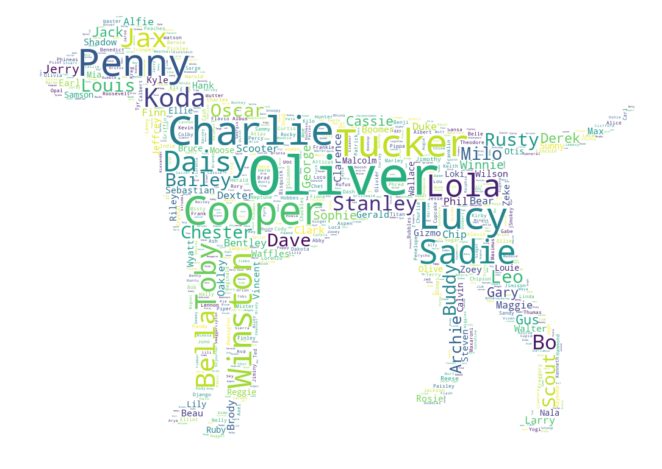

In [90]:
import urllib.request

# Download a dog image
urllib.request.urlretrieve("https://www.clipartqueen.com/image-files/dog-silhouette-dalmatiner.jpg", "dog.jpg")

#Create a single text of all dog's names 
texts = twitter_archive_master.name.str.cat(sep=' ')

# Creat stopword list
stopwords = set(STOPWORDS)
stopwords.add('None')

# Read the mask image
dog_mask = np.array(Image.open('dog.jpg'))

# Create a wordcloud image
wc = WordCloud(background_color="white", max_words=2000, mask=dog_mask, stopwords=stopwords)

# Generate word cloud
wc.generate(texts)

# Store to file
wc.to_file("dog_wordcloud.png")

# Show
plt.figure(figsize=[12,8])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.show()

#### Question 2: What are some of the most popular dog breed?

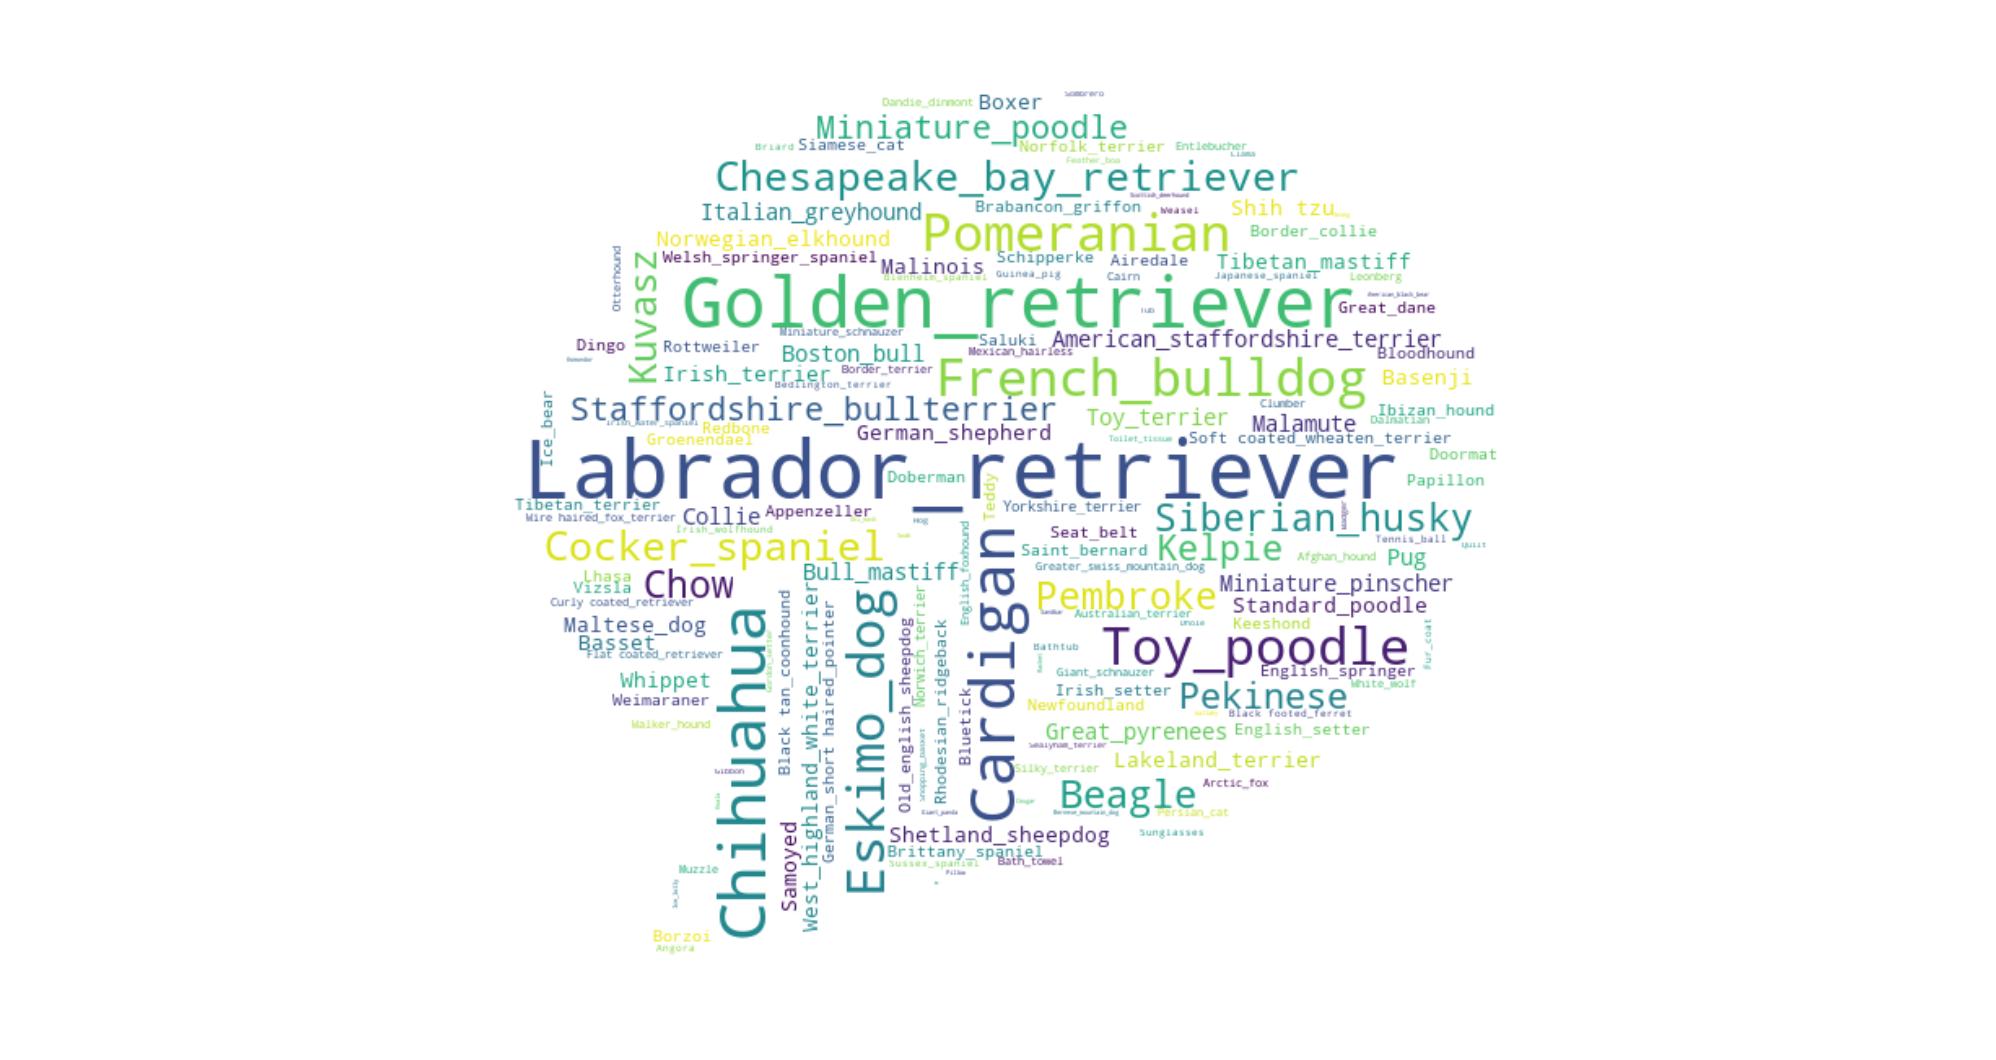

In [91]:
#Creat a list of predected dog beed
breed = twitter_archive_master.loc[twitter_archive_master.pred_results.isin(['Dog', 'Maybe Dog']), ['p1','p2','p3']]
breed_text = breed.p1.str.cat(sep ='') + breed.p2.str.cat(sep=' ') + breed.p3.str.cat(sep=' ')


# Download a dog image
urllib.request.urlretrieve("https://imageog.flaticon.com/icons/png/512/71/71580.png?size=1200x630f&pad=10,10,10,10&ext=png&bg=FFFFFFFF", 'breed.jpg')

breed_mask = np.array(Image.open('breed.jpg'))
                         
# Create a wordcloud image
wc = WordCloud(background_color="white", max_words=2000, mask = breed_mask, stopwords=stopwords)

# Generate word cloud
wc.generate(breed_text)

# Store to file
wc.to_file("breed_wordcloud.png")

# Show
plt.figure(figsize=[35,35])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.show()


#### Question 3: What is the most popular stage of dog at WeRateDogs?

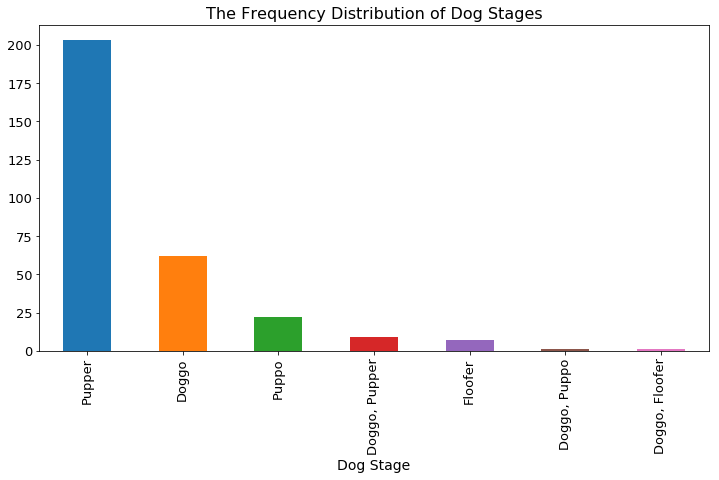

In [92]:
# Extract data for dog stages
stage_data = twitter_archive_master.dog_stage.value_counts()[1:]

# Plot bar chart
stage_data.plot(kind ='bar', figsize = (12,6))

# Configure bar chart

plt.title ('The Frequency Distribution of Dog Stages', size = 16)
plt.xlabel('Dog Stage', size = 14)
plt.xticks(size = 13)
plt.yticks(size = 13);

#### Question 4: Which dog breeds are most retweeted?

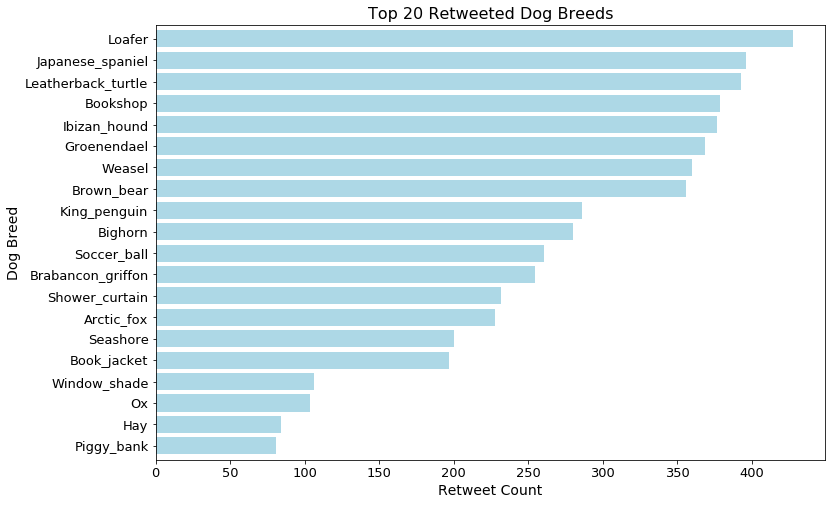

In [93]:
# Create a data frame which doesn't include the prediction of "Not Dog"
twitter_archive_master_dog = twitter_archive_master.query('pred_results =="Dog" or pred_results == "Maybe Dog"')

# Data of top 20 retweeted dog breeds
breed_retweet = twitter_archive_master_dog.groupby('p1')['retweet_count'].mean().sort_values().head(20)

# Plot horizontal bar chart
breed_retweet.plot(kind='barh', figsize =(12,8), width =0.8, color = 'lightblue')

# Configure bar chart

plt.title ('Top 20 Retweeted Dog Breeds', size = 16)
plt.ylabel('Dog Breed', size =14)
plt.xlabel('Retweet Count', size = 14)
plt.xticks(size = 13)
plt.yticks(size = 13);

#### Question 5: Which dog breeds are most favorited?

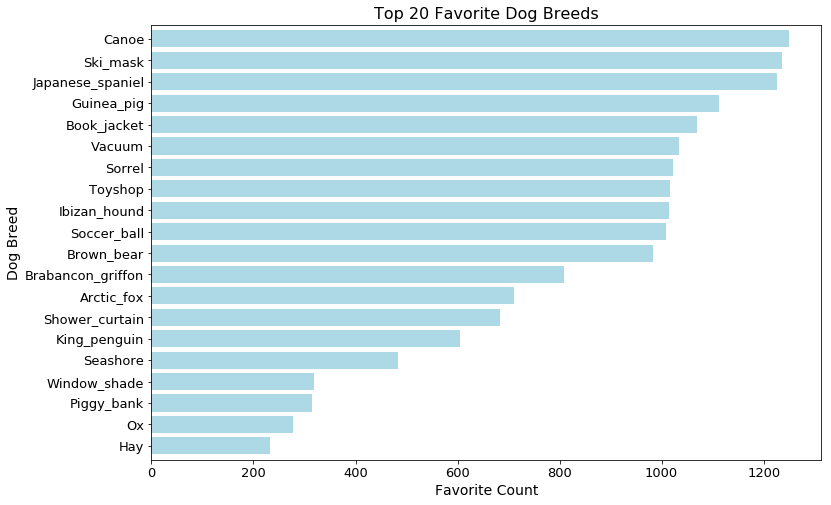

In [94]:
# Data of top 20 retweeted dog breeds
breed_retweet = twitter_archive_master_dog.groupby('p1')['favorite_count'].mean().sort_values().head(20)

# Plot horizontal bar chart
breed_retweet.plot(kind='barh', figsize =(12,8), width =0.8, color = 'lightblue')

# Configure bar chart

plt.title ('Top 20 Favorite Dog Breeds', size = 16)
plt.ylabel('Dog Breed', size =14)
plt.xlabel('Favorite Count', size = 14)
plt.xticks(size = 13)
plt.yticks(size = 13);

#### Question 6: Which dog breeds are highly rated?

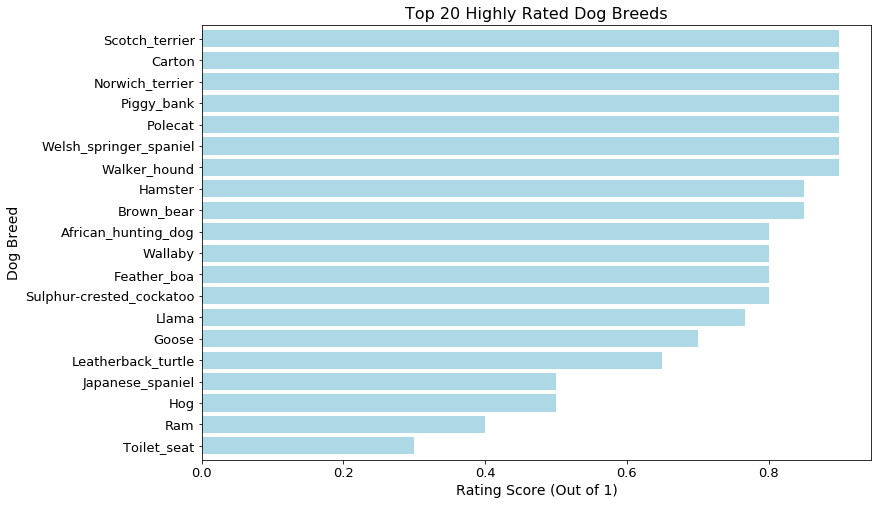

In [95]:
# Data of top 20 retweeted dog breeds
breed_retweet = twitter_archive_master_dog.groupby('p1')['rating_score'].mean().sort_values().head(20)

# Plot horizontal bar chart
breed_retweet.plot(kind='barh', figsize =(12,8), width =0.8, color = 'lightblue')

# Configure bar chart

plt.title ('Top 20 Highly Rated Dog Breeds', size = 16)
plt.ylabel('Dog Breed', size =14)
plt.xlabel('Rating Score (Out of 1)', size = 14)
plt.xticks(size = 13)
plt.yticks(size = 13);

#### Question 7: What is the trend in favorite and retweet count over time?

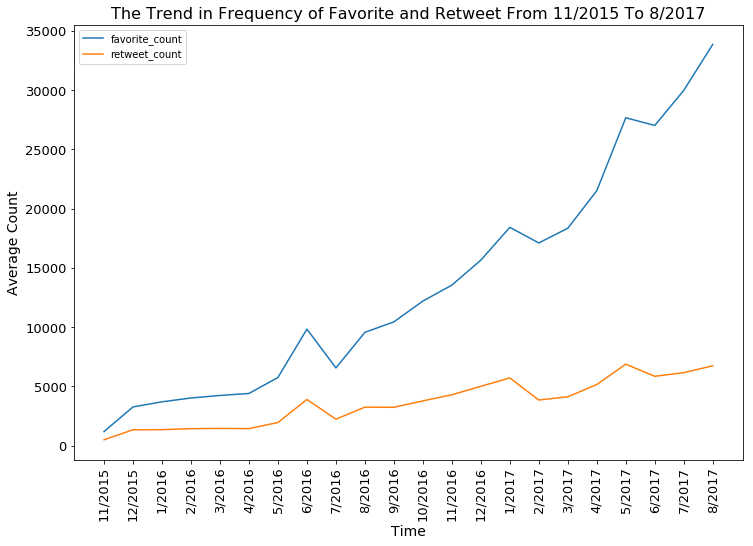

In [96]:
#Create the label for x-axis
xlabel = (twitter_archive_master.month.astype(str) + '/' + twitter_archive_master.year.astype(str)).unique().tolist()
xlabel.reverse()

#create line graph
df1 = twitter_archive_master.groupby(['year', 'month'])[['favorite_count','retweet_count']].mean().sort_values(by= ['year','month'])
df1.plot(kind ='line', figsize =(12,8))

#configure line graph
plt.title ('The Trend in Frequency of Favorite and Retweet From 11/2015 To 8/2017', size = 16)
plt.ylabel('Average Count', size =14)
plt.xlabel('Time', size = 14)
plt.xticks(np.arange(22),xlabel,  size = 13, rotation = 90)
plt.yticks(size = 13);

#### Question 8: What sources have highest number of retweet and favorite?

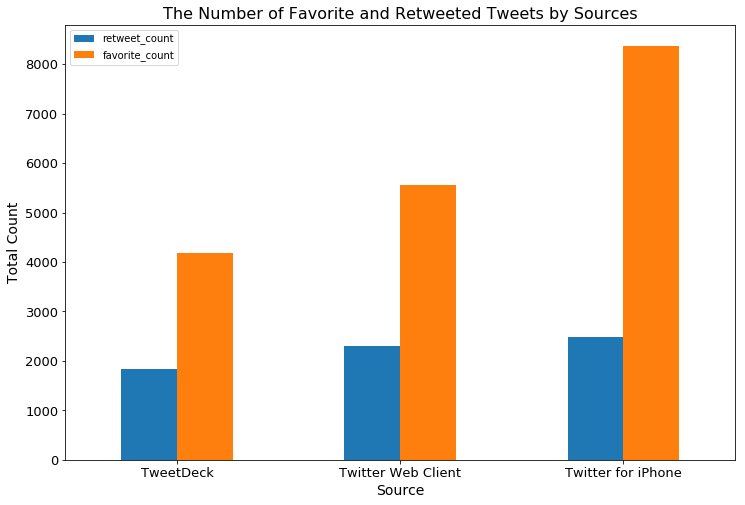

In [97]:
# Plot bar chart
twitter_archive_master.groupby('source')['retweet_count','favorite_count'].mean().plot(kind = 'bar', figsize = (12,8))

# Configure bar chart
plt.title ('The Number of Favorite and Retweeted Tweets by Sources', size = 16)
plt.legend 
plt.ylabel('Total Count', size =14)
plt.xlabel('Source', size = 14)
plt.xticks(size = 13, rotation = 0)
plt.yticks(size = 13);

#### Question 9: What is the number of tweets per weekday at WeRateDogs?

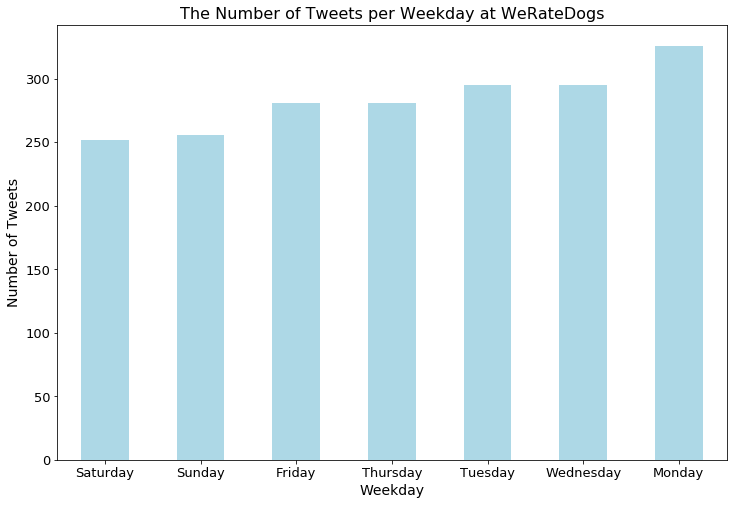

In [108]:
# Prepare data
tweet_weekday = twitter_archive_master.weekday.value_counts().sort_values()

# Plot bar chart
tweet_weekday.plot(kind ='bar', figsize = (12,8), color = 'lightblue')

# Configure bar chart
plt.title ('The Number of Tweets per Weekday at WeRateDogs', size = 16)
plt.ylabel('Number of Tweets', size =14)
plt.xlabel('Weekday', size = 14)
plt.xticks(  size = 13, rotation = 0)
plt.yticks(size = 13);